# Import Dependency

in this steps, we're importing all of dependencies that we would use further.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

## Load Data Train

In this steps we will load all of our data train from train.csv

In [2]:
housing_data = pd.read_csv('./train.csv')
housing_data['BuiltToSale'] = housing_data['YrSold'] - housing_data['YearBuilt']
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuiltToSale
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,T

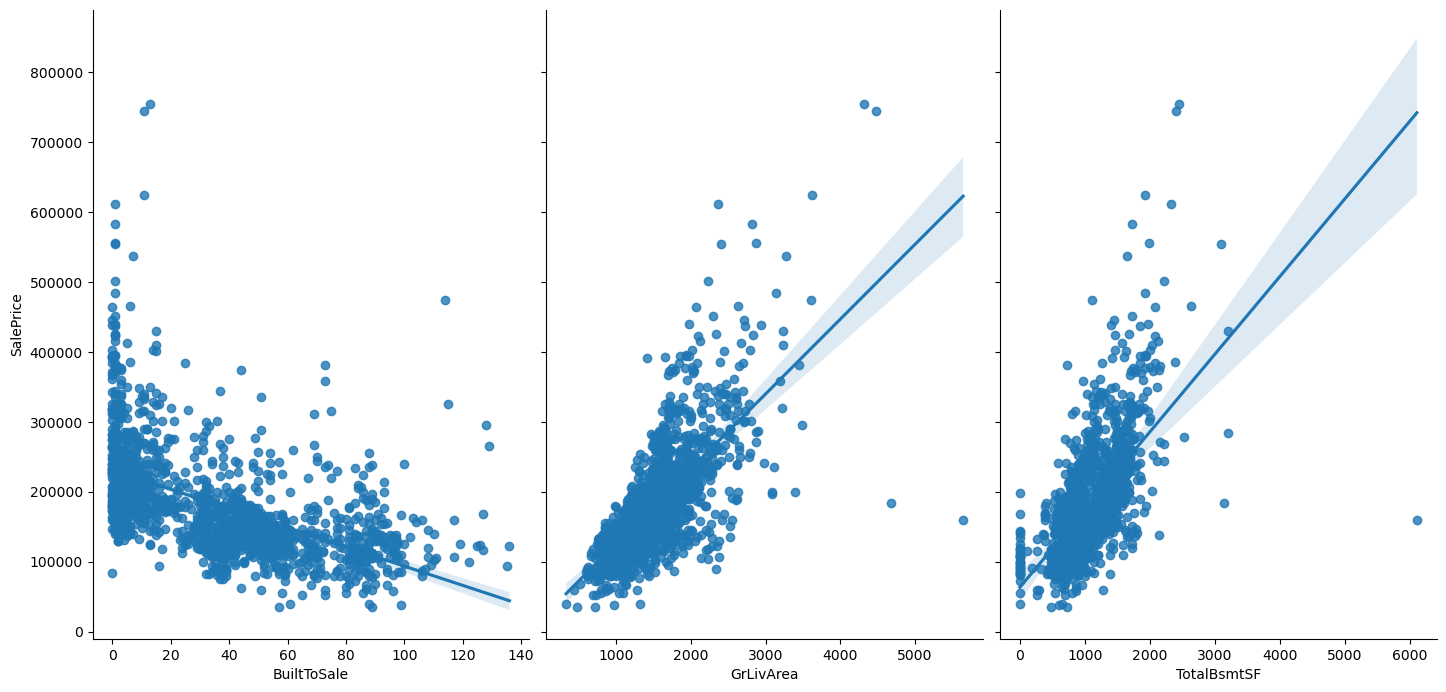

In [3]:
sns.pairplot(housing_data, x_vars=['BuiltToSale','GrLivArea','TotalBsmtSF'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg')

## Assign SalePrice as a target

In this steps we assign SalePrice as a target, also we dropping the column.

In [4]:
# assign data train to target
target = housing_data['SalePrice']
housing_data.drop(columns=['SalePrice'],inplace=True)
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Checking for most empty columns in the datas

In this steps, we calculate how much missing data from a features. If the missing data is larger than 60%, then we decide to remove the column.

In [5]:
# Check for missing data
missing_data = housing_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_percentage = (missing_data / len(housing_data)) * 100

# Display missing data details
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_df

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [6]:
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}


## Deep Dive Features

In this section forward, we will deep dive for each features correlations and determine normalization strategy.


### PoolArea

We will normalize NaN PoolQC with NoPool

In [7]:
housing_data['PoolQC'].fillna('NoPool', inplace=True)
housing_data['PoolQC'].unique()

housing_data.drop(columns=['PoolQC', 'PoolArea'], inplace=True)

### Misc Feature

Since there are so many missing value in MiscFeature, we decide to dropping it.

In [8]:
housing_data.drop(columns=['MiscVal', 'MiscFeature'], inplace=True)

### Id

It's obvious, that ID also needs to be dropped.

In [9]:
housing_data.drop(columns=['Id'], inplace=True)

### All time related

Delete all time related values, extract built to sale data.

In [10]:
housing_data['BuiltToSale'] = housing_data['YrSold'] - housing_data['YearBuilt']
housing_data.drop(columns=['MoSold', 'YrSold', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt'], inplace=True)

### Electrical

All home should be considered have electrical, if electrical data is empty then we gonna use impute the missing value with the most frequent category

In [11]:
most_common_electrical = housing_data['Electrical'].mode()[0]
housing_data['Electrical'].fillna(most_common_electrical, inplace=True)

### MasVnrType

Fill None with NoMasonry

In [12]:
housing_data['MasVnrType'].fillna('NoMasonry', inplace=True)

housing_data.drop(columns=['MasVnrType', 'MasVnrArea'], inplace=True)

### Quality Map Data



In [13]:
quality_columns = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
]


for c in quality_columns:
    quality_map_result = housing_data[c].map(quality_map)
    quality_map_result.fillna(0,inplace=True)
    housing_data.drop(columns=[c],inplace=True)
    housing_data = housing_data.join(quality_map_result)

housing_data[quality_columns]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4.0,3.0,5,4,0.0,3.0,3.0
1,3,3,4.0,3.0,5,3,3.0,3.0,3.0
2,4,3,4.0,3.0,5,4,3.0,3.0,3.0
3,3,3,3.0,4.0,4,4,4.0,3.0,3.0
4,4,3,4.0,3.0,5,4,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
1455,3,3,4.0,3.0,5,3,3.0,3.0,3.0
1456,3,3,4.0,3.0,3,3,3.0,3.0,3.0
1457,5,4,3.0,4.0,5,4,4.0,3.0,3.0
1458,3,3,3.0,3.0,4,4,0.0,3.0,3.0


### Other data with missing percentages > 80%

We will normalize Alley and Fence features

In [14]:
# housing_data.drop(columns=['Id'], inplace=True)

housing_data['Alley'].fillna('NoAlley',inplace=True)
housing_data['Fence'].fillna('NoFence',inplace=True)

housing_data.drop(columns=['Alley', 'Fence'], inplace=True)

### Encoding Categorical Data

In this step, we will normalized categorical data which need to be normalized.

In [15]:
# housing_data_encoded = pd.get_dummies(housing_data, columns=[
#     'Alley', 'PoolQC', 'Fence', 'MSZoning', 'Street', 
#     'PavedDrive', 'CentralAir', 'Heating', 'RoofStyle', 
#     'RoofMatl', 'LandSlope', 'Neighborhood', 'Electrical', 'MasVnrType',
#     'Foundation', 'LotShape', 'SaleType', 'SaleCondition', 'GarageFinish',
#     'GarageType', 'LotConfig', 'BldgType', 'HouseStyle'
# ])

housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'MSZoning', 'Street', 
    'PavedDrive', 'CentralAir', 'Heating', 'RoofStyle', 
    'RoofMatl', 'LandSlope', 'Neighborhood', 'Electrical',
    'Foundation', 'LotShape', 'SaleType', 'SaleCondition', 'GarageFinish',
    'GarageType', 'LotConfig', 'BldgType', 'HouseStyle'
])
housing_data_encoded.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandContour', 'Utilities',
       'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'Exterior1st',
       ...
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl'],
      dtype='object', length=165)

#### Condition1 and Condition2

Seems like it's intended to be 1 column, so that I merge it into 1 column instead.

In [16]:
# condition1_dummies = pd.get_dummies(housing_data_encoded['Condition1'])
# condition2_dummies = pd.get_dummies(housing_data_encoded['Condition2'])

# combined_conditions = (condition1_dummies | condition2_dummies).add_prefix('Condition_')
# combined_conditions.fillna(False, inplace=True)

# housing_data_encoded = housing_data_encoded.join(combined_conditions)
# housing_data_encoded.drop(columns=['Condition1', 'Condition2'], inplace=True)

# combined_conditions.sum()

housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'Condition1', 'Condition2',
])

#### Exterior1st and Exterior2nd

Seems like it's intended to be 1 column, so that I merge it into 1 column instead.

In [17]:
# exterior1_dummies = pd.get_dummies(housing_data_encoded['Exterior1st'])
# exterior2_dummies = pd.get_dummies(housing_data_encoded['Exterior2nd'])

# combined_exterior_conditions = (exterior1_dummies | exterior2_dummies).add_prefix('Exterior_')
# combined_exterior_conditions.fillna(False, inplace=True)

# housing_data_encoded = housing_data_encoded.join(combined_exterior_conditions)
# housing_data_encoded.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)

# combined_exterior_conditions.sum()

housing_data_encoded = pd.get_dummies(housing_data, columns=[
    'Exterior1st', 'Exterior2nd',
])

In [18]:
# JUST PLACEHOLDER FOR NOW
object_features = housing_data_encoded.select_dtypes(include=['object']).columns
housing_data_encoded = pd.get_dummies(housing_data_encoded, columns=object_features)
housing_data_encoded.describe()

object_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Normalized Remaining Numerical Values

In [19]:
housing_data_encoded['LotFrontage'].fillna(0, inplace=True)
# housing_data_encoded['GarageYrBlt'].fillna(0, inplace=True)
# housing_data_encoded['MasVnrArea'].fillna(0, inplace=True)

housing_data_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,5,4,3,4.0,3.0,5,4,0.0,3.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,

In [24]:
X_train, X_test, y_train, y_test = train_test_split(housing_data_encoded, target, test_size=0.5, random_state=42)

In [25]:
#train model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  1135456871.4748628
mean absolute error test:  20423.08749541354
r2 score test:  0.8334523417149813
mean squared error:  346825918.879223
mean absolute error train:  13347.74312676666
r2 score train:  0.9400822501871996


In [27]:
model.score(X_train, y_train)

0.9400822501871996

Text(0, 0.5, 'y_pred')

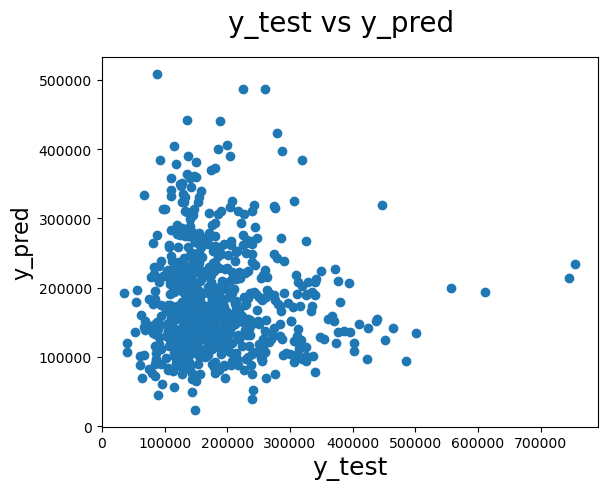

In [28]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  